In [10]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.io
# pip install scipy SI ES Q NO LO TIENEN INSTALADO

In [9]:
pip install scipy

     ---------------------------------------- 41.3/41.3 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Ana-Sophia Redstone\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
# Definimos la ruta del archivo .mat
file_path = r"C:\Users\Ana-Sophia Redstone\OneDrive\Documents\GitHub\Neurociencias-2026-1\S03_datasets\macaque47.mat"

# Leemos el contenido del archivo .mat
file_dict = scipy.io.loadmat(file_path)

In [12]:
file_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jun 29 12:11:31 2007',
 '__version__': '1.0',
 '__globals__': [],
 'CIJ': array([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(47, 47), dtype=uint8),
 'Names': array(['1   ', '2   ', '35  ', '36  ', '46  ', '5   ', 'Id  ', 'VP  ',
        '3a  ', '3b  ', '4   ', '6   ', '7a  ', '7b  ', 'AITd', 'AITv',
        'CITd', 'CITv', 'DP  ', 'FEF ', 'FST ', 'Ig  ', 'LIP ', 'MDP ',
        'MIP ', 'MSTd', 'MSTl', 'MT  ', 'PIP ', 'PITd', 'PITv', 'PO  ',
        'Ri  ', 'SII ', 'SMA ', 'STPa', 'STPp', 'TF  ', 'TH  ', 'V1  ',
        'V2  ', 'V3  ', 'V3A ', 'V4  ', 'V4t ', 'VIP ', 'VOT '],
       dtype='<U4')}

In [13]:
matriz = file_dict['CIJ']
columnas = file_dict['Names']

In [14]:
matriz.shape, len(columnas)

((47, 47), 47)

In [15]:
macaco_df = pd.DataFrame(data=matriz, columns=columnas, index=columnas)

In [16]:
macaco_df.columns = [columna.split(sep=' ')[0] for columna in macaco_df.columns]
macaco_df.index = macaco_df.columns

In [17]:
macaco_df

,1,2,35,36,46,5,Id,VP,3a,3b,...,TF,TH,V1,V2,V3,V3A,V4,V4t,VIP,VOT
1,0,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,1,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
36,0,0,1,0,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
46,0,1,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
5,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
Id,0,0,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
VP,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,0,1,1
3a,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3b,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


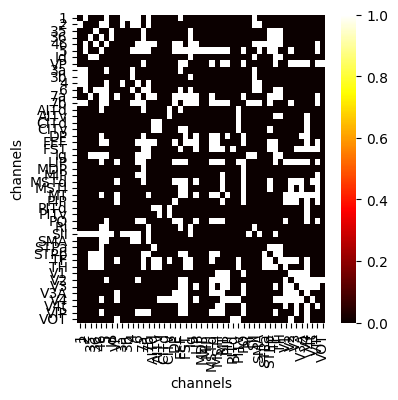

In [18]:
plt.figure(figsize=(4, 4))
ax = sns.heatmap(macaco_df.values,
                 annot=False, cmap='hot', fmt=".2f",
                 xticklabels=macaco_df.columns, yticklabels=macaco_df.index)
ax.set(xlabel="channels", ylabel="channels")
plt.show()

# Actividad. 
1. Filtrar el dataframe para quedarse con las columnas 15 a 35 y las filas 15 a 35,
2. Mostrar el mapa de calor
3. Crear el grafo dirigido
4. Calcular el grado del grafo

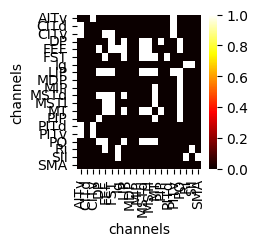

In [19]:
new_df = macaco_df.iloc[15: 35, 15: 35]
plt.figure(figsize=(2, 2))
ax = sns.heatmap(new_df.values,
                 annot=False, cmap='hot', fmt=".2f",
                 xticklabels=new_df.columns, yticklabels=new_df.index)
ax.set(xlabel="channels", ylabel="channels")
plt.show()

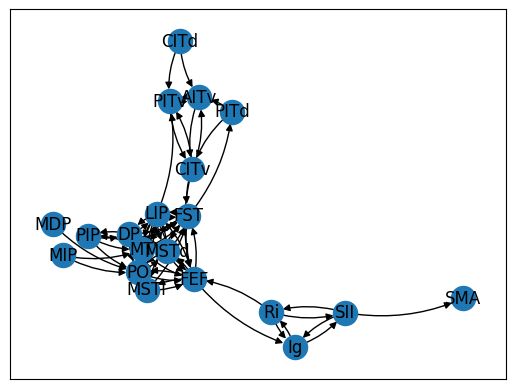

In [20]:
G = nx.from_pandas_adjacency(macaco_df.iloc[15: 35, 15: 35], create_using=nx.DiGraph())

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.15')

# Actividad
1. Actualizar from main para ver el archivo _macaco_M132_F99_LH_
2. Plotear en 3D el grafo completo utilizando las coordenadas del archivo csv

Nota: El archivo es csv, tons hay q reemplazar el pd.read_excel por pd.read_csv


In [21]:
coordenadas_file = r"C:\Users\Ana-Sophia Redstone\OneDrive\Documents\GitHub\Neurociencias-2026-1\S03_datasets\macaco_M132_F99_LH.csv"
coordenadas_df = pd.read_csv(coordenadas_file)

coordenadas_df.set_index('region', inplace=True, drop=True)

In [22]:
coordenadas_df

,x,y,z
region,,,
V1,-13.2,-76.5,7.5
V2,-11.1,-70.4,10.2
V3,-9.3,-66.1,11.9
V3A,-12.8,-61.9,13.9
V4,-7.8,-57.8,13.1
V4t,-9.6,-54.7,11.8
MT,-22.4,-59.7,1.8
MSTd,-21.6,-53.1,13.6
MSTl,-20.9,-50.2,12.3


In [23]:
macaco_df.columns

Index(['1', '2', '35', '36', '46', '5', 'Id', 'VP', '3a', '3b', '4', '6', '7a',
       '7b', 'AITd', 'AITv', 'CITd', 'CITv', 'DP', 'FEF', 'FST', 'Ig', 'LIP',
       'MDP', 'MIP', 'MSTd', 'MSTl', 'MT', 'PIP', 'PITd', 'PITv', 'PO', 'Ri',
       'SII', 'SMA', 'STPa', 'STPp', 'TF', 'TH', 'V1', 'V2', 'V3', 'V3A', 'V4',
       'V4t', 'VIP', 'VOT'],
      dtype='object')

In [24]:
coordenadas_df.index

Index(['V1', 'V2', 'V3', 'V3A', 'V4', 'V4t', 'MT', 'MSTd', 'MSTl', 'LIP',
       'VIP', 'PIP', 'PO', 'FEF', '46', '7a', '7b', 'SMA', '6', '4', '3a',
       '3b', '1', '2', '5', 'DP', 'MDP', 'MIP', 'FST', 'AITd', 'AITv', 'PITd',
       'PITv', 'CITd', 'CITv', 'VOT', 'TF', 'TH', '35', '36', 'Id', 'VP', 'Ig',
       'STPa', 'STPp', 'Ri', 'SII'],
      dtype='object', name='region')

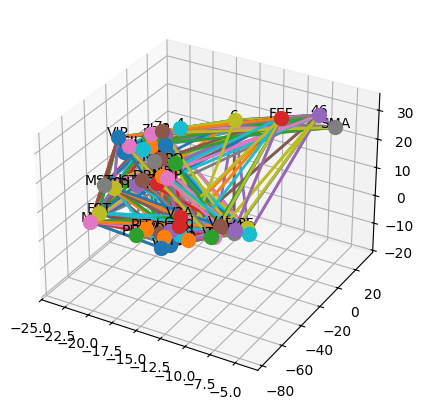

In [25]:

G = nx.from_pandas_adjacency(macaco_df, create_using=nx.DiGraph())

# Creamos el plot3D del grafo
pos3D = {canal: (coordenadas_df.loc[canal, 'x'],
                 coordenadas_df.loc[canal, 'y'],
                 coordenadas_df.loc[canal, 'z']) for canal in coordenadas_df.index}

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los nodos en 3d
for canal, (x, y, z) in pos3D.items():
    ax.scatter(x, y, z, s=100)
    ax.text(x, y, z+0.03, canal, fontsize=10, ha='center')

for i, j, data in G.edges(data=True):
    x = [pos3D[i][0], pos3D[j][0]]
    y = [pos3D[i][1], pos3D[j][1]]
    z = [pos3D[i][2], pos3D[j][2]]
    ax.plot(x, y, z, linewidth=data['weight']*2)
plt.show()